In [1]:
from itertools import permutations
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
fleet = pd.read_csv('Fleet Data.csv')
air = pd.read_csv('airline-safety.csv')
car = pd.read_csv('traffic-collision-data-from-2010-to-present.csv')

In [3]:
del fleet['Aircraft Type']
del fleet['Parent Airline']
del fleet['Future']
del fleet['Orders']
del fleet['Historic']
del fleet['Total']

In [4]:
fleet.head()

,Airline,Current,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,1.0,$90,$90,11.6
1,Olympic Air,NaN,$90,$0,NaN
2,Aegean Airlines,38.0,$98,"$3,724",7.5
3,Olympic Air,NaN,$98,$0,NaN
4,Aegean Airlines,8.0,$115,$919,10.3


In [5]:
fleet = fleet.dropna()

In [6]:
fleet.isna().sum()

Airline                 0
Current                 0
Unit Cost               0
Total Cost (Current)    0
Average Age             0
dtype: int64

In [7]:
fleet.head()

,Airline,Current,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,1.0,$90,$90,11.6
2,Aegean Airlines,38.0,$98,"$3,724",7.5
4,Aegean Airlines,8.0,$115,$919,10.3
5,Olympic Air,2.0,$22,$44,2.4
9,Olympic Air,12.0,$31,$376,12.6


In [8]:
fleet['Airline'].unique()

array(['Aegean Airlines', 'Olympic Air', 'Rossiya Airlines',
       'Aurora Airlines', 'Aeroflot', 'Pobeda', 'Aerolineas Argentinas',
       'Austral Líneas Aéreas', 'Air Algerie', 'Air Arabia',
       'Air Arabia Egypt', 'Air Arabia Jordan', 'Air Arabia Maroc',
       'Air Astana', 'Air Berlin', 'Air Canada', 'Air Canada Jetz',
       'Air Canada Rouge', 'Air Canada Regional', 'Air China',
       'Shenzhen Airlines', 'Air Macau (66.9%)',
       'Shandong Airlines (51%)', 'Air China Inner Mongolia',
       'Kunming Airlines (80%)', 'Dalian Airlines (80%)',
       'Air China Cargo', 'Air Europa', 'Air France', 'KLM', 'HOP!',
       'Transavia France', 'Transavia', 'Martinair', 'KLM Cityhopper',
       'Air India', 'Air India Regional', 'Air India Express',
       'Air New Zealand', 'Air New Zealand Link', 'Air Transat',
       'Air Transport International', 'ABX Air', 'Air Wisconsin',
       'AirAsia', 'AirAsia India', 'AirAsia Japan', 'Thai AirAsia',
       'Indonesia AirAsia', 'Indone

In [9]:
fleet.head()

,Airline,Current,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,1.0,$90,$90,11.6
2,Aegean Airlines,38.0,$98,"$3,724",7.5
4,Aegean Airlines,8.0,$115,$919,10.3
5,Olympic Air,2.0,$22,$44,2.4
9,Olympic Air,12.0,$31,$376,12.6


In [10]:
air['Airline']=air['airline']

In [11]:
airdf = pd.merge(air,fleet,on='Airline')

In [12]:
del airdf['Airline']

In [13]:
airdf[airdf.columns[1:]] = airdf[airdf.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [14]:
airdf.sample(n=5)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,Current,Unit Cost,Total Cost (Current),Average Age
59,Condor,4.179826e+08,2.0,1.0,16.0,0.0,0.0,0.0,16.0,187.0,2990.0,21.3
63,El Al,3.354480e+08,1.0,1.0,4.0,1.0,0.0,0.0,6.0,295.0,1767.0,13.5
72,Finnair,5.064650e+08,1.0,0.0,0.0,0.0,0.0,0.0,10.0,98.0,980.0,14.4
61,El Al,3.354480e+08,1.0,1.0,4.0,1.0,0.0,0.0,7.0,316.0,2211.0,21.4
8,Air Canada,1.865254e+09,2.0,0.0,0.0,2.0,0.0,0.0,42.0,98.0,4116.0,23.3


In [15]:
airdf = airdf.groupby(['airline']).mean()

In [16]:
airdf

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,Current,Unit Cost,Total Cost (Current),Average Age
airline,,,,,,,,,,,
Aer Lingus,3.209067e+08,2.0,0.0,0.0,0.0,0.0,0.0,12.750000,131.500000,1591.750000,14.450000
Aerolineas Argentinas,3.858036e+08,6.0,0.0,0.0,1.0,0.0,0.0,18.000000,176.666667,2065.666667,11.733333
Air Canada,1.865254e+09,2.0,0.0,0.0,2.0,0.0,0.0,20.750000,167.000000,3249.250000,14.500000
Air France,3.004003e+09,14.0,4.0,79.0,6.0,2.0,337.0,25.111111,202.000000,4699.000000,11.188889
Alitalia,6.980125e+08,7.0,2.0,50.0,4.0,0.0,0.0,20.600000,167.600000,2852.400000,12.040000
All Nippon Airways,1.841234e+09,3.0,1.0,1.0,7.0,0.0,0.0,35.833333,172.333333,7432.500000,9.516667
Austrian Airlines,3.582398e+08,1.0,0.0,0.0,1.0,0.0,0.0,10.125000,110.250000,864.875000,15.600000
Avianca,3.969226e+08,5.0,3.0,323.0,0.0,0.0,0.0,16.428571,128.000000,1830.000000,4.671429
China Airlines,8.132165e+08,12.0,6.0,535.0,2.0,1.0,225.0,14.500000,242.166667,3285.833333,8.033333


In [17]:
airdf.to_csv('withfleet.csv')

In [18]:
fiveinc = airdf.nlargest(5, ['incidents_85_99', 'incidents_00_14', 'fatal_accidents_85_99', 'fatal_accidents_00_14',
                            'fatalities_85_99', 'fatalities_00_14'])

In [19]:
# withfleet

NameError: name 'withfleet' is not defined

In [20]:
airdf.shape

(28, 11)

In [21]:
airdf.corr(method='pearson')

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,Current,Unit Cost,Total Cost (Current),Average Age
avail_seat_km_per_week,1.000000,0.082550,0.120688,0.073765,0.580162,0.132302,0.133258,0.546362,0.215710,0.649435,-0.047487
incidents_85_99,0.082550,1.000000,0.814387,0.449781,0.292813,0.497732,0.166163,-0.154557,0.273998,-0.130079,-0.298916
fatal_accidents_85_99,0.120688,0.814387,1.000000,0.647438,0.148901,0.380263,0.117215,-0.189939,0.503764,-0.136788,-0.419770
fatalities_85_99,0.073765,0.449781,0.647438,1.000000,-0.191018,0.044987,-0.028222,-0.116742,0.385662,-0.052697,-0.387158
incidents_00_14,0.580162,0.292813,0.148901,-0.191018,1.000000,0.408320,0.199356,0.462557,-0.169496,0.484957,-0.113518
fatal_accidents_00_14,0.132302,0.497732,0.380263,0.044987,0.408320,1.000000,0.705153,-0.133773,0.225017,-0.126478,-0.510010
fatalities_00_14,0.133258,0.166163,0.117215,-0.028222,0.199356,0.705153,1.000000,-0.094667,0.272441,-0.092243,-0.355152
Current,0.546362,-0.154557,-0.189939,-0.116742,0.462557,-0.133773,-0.094667,1.000000,-0.354561,0.985224,0.092606
Unit Cost,0.215710,0.273998,0.503764,0.385662,-0.169496,0.225017,0.272441,-0.354561,1.000000,-0.243254,-0.367815
Total Cost (Current),0.649435,-0.130079,-0.136788,-0.052697,0.484957,-0.126478,-0.092243,0.985224,-0.243254,1.000000,0.045619


In [22]:
fiveinc.shape

(5, 11)

<AxesSubplot:xlabel='avail_seat_km_per_week', ylabel='Average Age'>

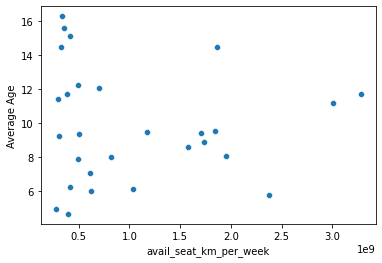

In [23]:
sns.scatterplot(data=airdf, x='avail_seat_km_per_week', y='Average Age')

In [24]:
airdf.size

308